# 导入模块

In [1]:
#1.导入文字和表格模组
from docx import Document
from docx.enum.text import WD_ALIGN_PARAGRAPH  #设置对象居中、对齐等。
from docx.enum.text import WD_TAB_ALIGNMENT,WD_TAB_LEADER,WD_LINE_SPACING  #设置制表符等
from docx.shared import Inches   #设置图像大小
from docx.shared import Pt,Cm   #设置像素、缩进等
from docx.shared import RGBColor    #设置字体颜色
from docx.shared import Length    #设置宽度
from docx.oxml.ns import qn  #设置中文版式
import os

from docx.enum.table import WD_TABLE_ALIGNMENT
from docx.enum.text import WD_PARAGRAPH_ALIGNMENT
from docx.enum.table import WD_ALIGN_VERTICAL
from docx.enum.text import WD_ALIGN_PARAGRAPH


#2.导入数据处理模组
import pymysql
import psycopg2
import pymysql.cursors
import pandas as pd
import numpy as np
from functools import reduce#计算求和
from decimal import Decimal#保证比例呈现两位小数
import re
import math #向上取整函数

#3.导入图像模组
from pyecharts.charts import Bar,Line,PictorialBar,Map,Pie,Sankey,Grid,Gauge,Radar,WordCloud,Liquid
from pyecharts import options as opts
from pyecharts.render import make_snapshot
from snapshot_selenium import snapshot
from pyecharts.commons.utils import JsCode
from pyecharts.components import Image
from pyecharts.options import ComponentTitleOpts
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors

import wordcloud
###使用本地包
# cmd运行：
# cd pyecharts-assets
# jupyter nbextension install assets
# jupyter nbextension enable assets/main
from pyecharts.globals import CurrentConfig, OnlineHostType
CurrentConfig.ONLINE_HOST = OnlineHostType.NOTEBOOK_HOST

In [2]:
xxmc = '湖南汽车工程职业学院'  #学校名称
xxsf = '陕西省'           #学校省份
xxcs = '西安市'           #学校城市
bynd = 2022               #毕业年份
pic_path = 'result/' #结果存储路径
model_path = 'model/派遣调研/xx绿/' #模板存储路径
###特殊的学院顺序，没有就不写
xy_order_str = '计算机科学与工程学院电子信息工程学院经济管理学院机电工程学院光电工程学院材料与化工学院艺术与传媒学院文学院建筑工程学院基础学院中国书法学院兵器科学与技术学院马克思主义学院'

###不用设置了
color_1 =color_2 =color_3 =color_4 =color_5 =color_6='#000000'
    

#矢量图设置,可以在阿里巴巴矢量图网站自行查找需要的图标,复制SVG代码
bd = 'path://M945.08544 366.6432l-425.97376-183.1936a20.5312 20.5312 0 0 0-8.12544-1.6896c-2.7648 0-5.52448 0.5632-8.14592 1.6896L76.87168 366.6432c-8.98048 3.84512-14.92992 13.65504-14.92992 24.59136 0 10.9568 5.94944 20.74112 14.92992 24.60672L502.8352 599.04a20.29056 20.29056 0 0 0 16.27136 0l331.1872-142.43328v145.7152c-17.75104 9.40032-30.08512 29.8496-30.08512 53.62688 0 23.7824 12.33408 44.22656 30.08512 53.62688v50.83136h43.6224v-50.82112c17.76128-9.40032 30.1056-29.8496 30.1056-53.63712s-12.34432-44.2368-30.1056-53.63712V437.84704l51.16416-22.00576c8.97536-3.8656 14.9248-13.65504 14.9248-24.60672 0-10.93632-5.94944-20.74624-14.9248-24.59136z m-434.0992 269.16352a47.96928 47.96928 0 0 1-19.03104-3.95776L226.4064 517.632v157.70112c0 129.16224 193.65888 167.936 254.208 167.936h60.69248c45.35808 0 254.22848-38.77376 254.22848-167.936v-157.696l-265.55904 114.21184a47.76448 47.76448 0 0 1-18.9952 3.95776z'
sf = 'path://M0,10 L10,10 C5.5,10 5.5,5 5,0 C4.5,5 4.5,10 0,10 z'
male = 'path://M724.8 314.2c2.8 1.6 5.5 3.2 8.2 5.1l8.2 5.6 0.1 9.8c0.4 28.5-3 52.6-10.4 71.1-6.9 17-17.1 29.7-30.7 37.3-9.3 33.1-20.2 63.8-35.6 89.6-17.8 29.7-41.2 52.5-74.4 64.8-14.8 5.4-52.7 8-89.1 7.4-35.2-0.5-70.5-4-84.5-10.5-30.1-13.9-51.3-37.2-67.4-66.3-13.8-24.8-23.6-53.7-32.1-84.2-14.1-7.4-24.7-20-31.8-37.1-7.8-18.7-11.4-43.2-10.9-72.2l0.1-9.9 8.2-5.5c2.1-1.4 4.2-2.7 6.3-3.9-9.2-114.1-5.7-156.3 36.6-204.5 82.6-67.7 272-65.3 355.7-3.9 57 53.8 61 114.1 43.5 207.3zM551.3 644.1l1.2 26.1-15.5 25.6 21.6 141.8L647 647.5l134.7-4.6c69.6 65.8 114.2 220.8 103.2 321.9H134.2c1.9-88.8 18.2-240.4 106.6-317.6l121.7 1.1 114 188 21.4-140.6-15.5-25.5 1.2-26.1c29.5-1.6 38.2-1.6 67.7 0zM652 273.7c-53.5 10.5-133.2 19.6-196.2-15.8-24.2-13.6-59.7 14.3-88.7 11.4-9 17.8-15.7 37.3-19.6 58l-3.2 17.1-17.2-1.7c-3.2-0.3-6.5 0.1-10 1.3-1.6 0.5-3.1 1.1-4.7 1.9 0.5 19 3.1 34.7 8 46.5 4.3 10.4 10.4 17.1 18.2 19.6l10.1 3.1 2.8 10.1c8.4 31.3 17.9 60.8 31.2 84.8 12.3 22.3 28.1 40 50 50.1 9.2 4.2 38.4 6.6 69 7.1 32.5 0.5 64.9-1.3 75.6-5.2 24.1-8.9 41.4-26.1 54.9-48.6 14.5-24.2 24.8-54.9 33.8-88.6l2.6-9.6 9.6-3.3c7.6-2.7 13.5-9.6 17.6-20 4.7-11.7 7.3-27.2 7.7-45.8-1.4-0.7-2.8-1.3-4.2-1.7-3.4-1.1-6.6-1.7-9.7-1.5l-16.8 1.1-3.1-16.5c-3.8-19.2-9.7-37.2-17.7-53.8z m0 0'
female = 'path://M354.304 631.808c18.944-7.168 44.544-17.408 56.32-26.624 7.168-5.632 11.264-16.384 12.8-28.16-4.608-3.072-9.216-6.144-12.288-9.728-53.248-54.784-56.32-132.608-56.832-229.376 8.704 1.536 271.872 5.12 284.16 3.584 2.048 109.056-5.632 176.128-68.608 234.496l-1.024 1.024c2.048 12.288 6.144 23.04 12.8 28.16 12.8 9.728 35.84 20.992 51.2 28.16-29.696 108.544-66.048 172.544-103.936 195.584-5.632-20.48-6.144-44.544-0.512-72.192-4.608-2.048-9.216-3.584-14.336-5.632-5.12 6.656-9.728 13.312-13.824 20.48-4.096-6.656-8.704-13.824-13.824-20.48-4.608 2.048-9.216 3.584-14.336 5.632 5.632 29.184 5.12 54.272-1.536 75.776-41.984-19.968-82.944-88.064-116.224-200.704z m393.216 16.384c-9.216-28.672-16.384-64.512-9.728-95.232 16.384-74.24 3.584-138.752-5.12-159.744-20.992-51.2 2.56-101.888-6.656-140.8-14.848-62.464-41.984-105.984-86.016-135.68-60.928-40.96-151.552-37.888-230.4-20.48-69.12 14.848-134.656 49.152-130.56 107.008 3.072 41.984-4.608 71.168-19.968 92.16-13.824 19.456-15.872 39.424-12.8 60.416 9.216 54.272 48.128 83.968 26.624 136.704-18.944 47.616-41.984 124.928-44.544 169.472-31.232 11.776-66.56 26.112-103.936 39.936-28.672 52.736-38.4 125.952-32.768 268.8H890.88c2.56-111.616 1.024-221.184-40.448-296.96-31.744-7.168-68.608-16.896-102.912-25.6z'
#cube = 'path://M42.666667 128m53.333333 0l832 0q53.333333 0 53.333333 53.333333l0 661.333334q0 53.333333-53.333333 53.333333l-832 0q-53.333333 0-53.333333-53.333333l0-661.333334q0-53.333333 53.333333-53.333333Z'
cube = 'path://M62 62h900v900h-900v-900z'
box = 'path://M962 802H 62V 222h 900v 580z      M162 702h 793V 322H 70v 380z'
boy='path://M516.769444 0c-282.75 0-512 229.25-512 512 0 282.75 229.25 512 512 512 282.75 0 512-229.25 512-512 0-282.875-229.25-512-512-512z m0 987.375c-262.5 0-475.375-212.875-475.375-475.375 0-126.125 50.125-247 139.25-336.125S390.769444 36.5 516.769444 36.5c262.625 0 475.375 212.875 475.375 475.375 0.125 262.625-212.75 475.5-475.375 475.5z M788.144444 691.625c2.5 8 4.25 16.25 5.125 24.625 1.625 10 2.375 20 2.375 30.125 0.125 9.625-0.875 19.25-2.75 28.75-1 7.25-3.625 14.25-7.625 20.375-5.5 4.625-12.125 7.875-19.125 9.375-12.75 3.5-25.625 6.25-38.625 8.25-15.5 2.5-32.625 5-51.75 7.25-19.125 2.25-37.875 4.25-57 5.875-19.125 1.625-37.5 2.75-55.375 3.5-17.875 0.75-33.5 1-47 1s-29.125-0.5-47-1.375c-17.875-0.875-35.875-2.125-54.625-3.5-18.75-1.375-37.5-3-55.75-4.875-18.375-1.875-35.5-4-50.625-6.25s-28.25-4.5-39-6.5c-6.875-0.75-13.625-3-19.5-6.625-6.875-8.75-10.625-19.625-10.75-30.75-2.125-22.5-1-45.25 3.25-67.375 1.625-14.375 9.125-27.375 20.75-35.875 11.75-8.625 24.75-15.25 38.625-19.625 14.75-4.875 30.25-9.125 46.625-12.75 14.875-3.125 29.125-8.75 42.25-16.625 7.875-4.375 15.25-9.75 21.875-16 4.875-4.25 8.75-9.375 11.5-15.25 2-5 3.125-10.5 3.125-16s-0.375-11.75-0.75-18.625c-0.25-9-4.125-17.5-10.75-23.5-6.75-5.875-13.75-11.625-20.75-17.25-4.25-3.125-7.625-7.25-10-12-2.875-5.375-5.5-10.75-8-16.25-2.625-6.5-4.875-13.125-6.75-19.875-0.75-0.875-2.375-2.5-4.375-4.875-1.875-3-3.625-6.125-5.125-9.375-2.625-5.5-5-11.125-6.75-17-2.125-6.5-3.75-13.125-4.75-19.875-0.875-4.875-0.75-10 0.375-14.875 0.25-4.625 1.5-9 3.625-13.125 0.125-16.25 1.125-32.375 3.125-48.5 2.25-14.75 5.5-29.25 9.625-43.5 4.25-15.375 11.5-29.75 21.5-42.125 8.5-10.875 18.375-20.5 29.5-28.75 10-7.5 21-13.375 32.625-17.625 11-4.125 22.25-7 33.875-8.625 11-1.5 22-2.375 33.125-2.375 9.375 0.625 18.75 2 27.875 4 6.125 1.25 12 3.125 17.5 5.875 4.375 2.125 8.375 5 12 8.375 3.125 3.125 6.375 6.5 10 9.625h14.375c4.5 0 8.875 0.625 13.125 1.75 4.625 1.375 8.875 3.625 12.75 6.625 5 4.125 9.5 8.75 13.5 13.875 11.25 13.375 19.875 28.75 25.5 45.25 5.25 15.25 9.25 30.75 12 46.625 2.5 16.75 4.125 33.625 4.75 50.5 1 2.625 1.625 5.5 2 8.25 0.375 3.25 0.75 7.125 1.25 11.75 0.375 5.75-0.125 11.625-1.25 17.25-0.5 7.375-2 14.75-4.375 21.75-1.5 4.375-3.875 8.375-6.75 12-2.125 3-5 5.375-8.375 6.875-1.75 6.875-4 13.5-6.75 19.875-2.375 5.5-4.75 11-7.625 16.25-2.5 4.75-6 8.875-10.375 12-8.375 6.5-15.5 12-20.75 16.25-6.25 6-10.375 13.875-11.5 22.5-1.25 6.375-1.625 12.875-1.25 19.375 0.5 7 2.5 13.75 5.625 19.875 3.75 7.375 9 13.875 15.5 19 9.125 7 19.375 12.375 30.25 16 11.5 4 24.25 8 37.875 11.5 13.5 3.5 27.125 7.375 39.875 11.75 12.125 4.125 23.625 9.875 34.25 17 9.5 6.375 16.75 15.875 20.625 26.625z m-240.375-22.75c1.5-2.625 1.625-5.875 0.375-8.625-1.375-3.125-3.25-6.125-5.625-8.625-2.75-2.75-5.625-5.75-9.125-9h-34.25c-3.125 2.75-5.875 5.75-8.375 9-2 2.25-3.625 4.875-4.75 7.625-1.25 2.375-1.125 5.375 0.375 7.625 3.25 6.5 6.375 12 8.75 17 2 4.375 4.875 8.25 8.375 11.375-1.25 4-2.375 10-4.375 17.625s-4 15.5-6 23.5c-2 8.125-3.125 15.75-4.375 22.875-1 5.375-1.5 10.75-1.625 16.25 0.125 3 1.25 6 3.25 8.25 2.5 3.5 5.125 6.875 8 10 2.625 3.25 5.75 6.125 9.125 8.625 4.875 4.625 12.625 4.625 17.5 0 3.75-2.375 7.125-5 10.375-8 3.125-2.875 5.75-6.125 8-9.625 2-2.5 3.25-5.5 3.625-8.625-0.375-4.75-1.125-9.5-2.375-14.125-1.625-6.75-3.125-14.125-4.75-22.5-1.625-8.25-3.625-16.375-5.625-24.25-2-7.75-3.625-14.125-5.125-18.75 3.25-2.875 6.125-6.25 8.375-10 2.75-4.375 6.25-10.25 10.25-17.625z'
girl='path://M516.769444 0c-282.75 0-512 229.25-512 512 0 282.75 229.25 512 512 512 282.75 0 512-229.25 512-512 0-282.75-229.125-512-512-512z m0 987.375c-262.5 0-475.375-212.75-475.375-475.375C41.394444 385.875 91.519444 265 180.644444 175.875S390.769444 36.625 516.769444 36.625c262.625 0 475.375 212.875 475.375 475.375 0.125 262.625-212.75 475.375-475.375 475.375z M788.019444 687c2.625 7.875 4.5 15.875 5.625 24.125 1.25 9.875 1.875 19.75 2 29.625 0 9.5-0.75 19-2.375 28.375-0.875 7.25-3.5 14.25-7.625 20.375-5.625 4.75-12.25 7.875-19.5 9.25-10.375 3.125-23.875 6.375-39.875 9.5-15.875 3.125-33.875 6.25-53.375 9.25-19.5 3-39.375 5.5-59 7.625-19.5 2.125-38.625 3.75-57 4.875-18.375 1.125-33.875 1.625-47.375 1.625-13.5 0-28.625-0.625-46.25-2-17.5-1.25-34.625-2.875-53.375-4.75-18.75-1.875-36.25-4-54.125-6.75-17.875-2.75-34.25-5.125-49-8-14.75-2.75-27.125-5.25-37-7.625-6.875-1.125-13.5-3.375-19.5-6.75-7-8.75-10.875-19.625-11.125-30.875-2.125-22.375-1-45 3.125-67.125 2.125-14 9.75-26.625 21.125-35 11.875-8.375 25.125-14.875 39-19.125 14.75-4.625 30.25-8.875 46.25-12.75 14.875-3.25 29.125-8.875 42.25-16.5 7.5-4.125 14.625-9 21.125-14.625 4.5-3.875 8.25-8.5 11.125-13.625 2.25-4.25 3.625-8.875 4.375-13.625 0.75-5.125 0.875-10.25 0.375-15.25l-30.625-4.625h-119.5c20.5-22.25 34.375-49.875 39.875-79.625-0.25-59.375 8.375-118.375 25.5-175.25 9.5-21.5 23.375-40.75 40.625-56.625 33.875-36.625 83.625-54.125 133-47 64.125-7.25 126.5 24 159.25 79.625 24.875 63.5 38.25 130.875 39.875 199.125 0.875 31.125 15.5 60.25 39.875 79.625h-119.5l-31.875 4.75c-0.375 5.625 0 11.375 1.25 16.875 1.375 6 3.75 11.75 7.125 16.875 4.5 6.125 9.875 11.5 15.875 15.875 8.5 5.75 17.75 10.25 27.5 13.375 12.125 4.5 24.5 8.375 37 11.5 13.5 3.25 26.75 7.125 39.875 11.75 12.125 4.125 23.625 9.75 34.25 16.875 9.625 6.375 16.875 15.75 20.75 26.625z m-266.5 102.375c3.75-0.5 7.25-1.875 10.375-4 4.875-2.875 9.5-6.25 14-9.875 4.375-3.5 8.5-7.375 12.375-11.375 2.5-2.375 4.375-5.5 5.125-8.875-0.375-4.5-1-9-2-13.375-1.625-6.375-3.125-13.375-5.125-21-2-7.625-3.625-15-5.625-22.25-1.25-6-2.875-12-4.75-17.75 4.625-3.25 8.75-7.125 12.375-11.5 3-3.5 4.875-8 5.125-12.75-0.125-3.75-1.5-7.375-4-10.125-2.625-3.5-5.5-6.625-8.75-9.5-3.625-3-8-5.875-12.375-8.875h-35c-4 3-8 6-11.125 8.875-2.875 2.75-5.5 5.875-7.625 9.25-2.25 3-3.5 6.75-3.625 10.5 0.625 3.625 2.375 6.875 4.75 9.5 3.875 4.625 8.125 8.875 12.75 12.75-2 5.25-3.75 10.75-5.125 16.25-2 7-4.375 14.375-6.75 22.25-2.375 7.875-4.375 15.25-6 22.25-1.375 5.125-2.125 10.375-2.375 15.625 0.875 3.375 2.625 6.5 5.125 8.875 4 4.125 8.25 7.875 12.75 11.375 4.625 3.75 9.5 7 14.75 9.875 3.25 2.125 6.875 3.5 10.75 3.875z'
location='path://M528 32C325.056 32 160 196.8 160 399.36c0 75.2 22.656 147.584 65.024 208.48 2.112 3.648 4.256 7.168 6.784 10.592l268.608 353.472c7.296 8.096 17.088 12.576 27.584 12.576 10.368 0 20.224-4.512 28.768-14.08l267.36-352c2.624-3.52 4.896-7.36 6.112-9.6A364.864 364.864 0 0 0 896 399.36C896 196.8 730.912 32 528 32z m0 498.72a131.52 131.52 0 0 1-131.456-131.232 131.488 131.488 0 0 1 262.88 0 131.52 131.52 0 0 1-131.424 131.2z'
airplane='path://M965.40416 342.76608c-19.50976-52.24704-47.744-100.41472-83.92064-143.16288-18.26688-21.58592-50.57408-24.27392-72.15872-6.0096-21.58464 18.26688-24.2752 50.5728-6.00832 72.15872C861.4336 334.42816 893.44 421.88032 893.44 512c0 210.32576-171.11424 381.44-381.44 381.44-210.32704 0-381.44-171.11424-381.44-381.44 0-210.32704 171.11296-381.44 381.44-381.44 60.48896 0 118.30784 13.72672 171.85152 40.8 25.2288 12.75648 56.03328 2.64704 68.7936-22.58816 12.76032-25.23392 2.64576-56.03456-22.58816-68.7936C662.05312 45.5936 588.68992 28.16 512 28.16c-65.29536 0-128.66432 12.8-188.34688 38.04416-57.62176 24.37248-109.36064 59.2512-153.7792 103.66976-44.41856 44.41856-79.29856 96.15744-103.66976 153.77792C40.96 383.3344 28.16 446.70464 28.16 512c0 65.29536 12.8 128.6656 38.04416 188.34688 24.37248 57.62176 59.2512 109.36064 103.66976 153.7792s96.15744 79.29856 153.7792 103.66976C383.33568 983.04 446.70464 995.84 512 995.84c65.29536 0 128.6656-12.8 188.34816-38.04416 57.62176-24.3712 109.36064-59.2512 153.77792-103.66976 44.41856-44.41856 79.29856-96.15744 103.66976-153.7792C983.04 640.6656 995.84 577.29536 995.84 512 995.84 453.79328 985.6 396.85504 965.40416 342.76608z  M718.52672 248.7872c-28.15104 3.3984-50.06336 18.60608-68.33152 39.93472-17.31456 20.21376-35.4048 39.76192-53.09312 59.65568-9.1136 10.24896-17.9328 20.76672-27.22688 30.848-3.22944 3.50464-5.80992 8.89984-12.31232 7.28448-3.84896-0.95616-7.7504-1.69984-11.59936-2.65472-36.48128-9.04064-72.96128-18.08512-109.43232-27.168-60.3712-15.03616-120.73344-30.10816-181.10592-45.14432-9.62304-2.39616-18.24896 0.9856-22.54336 9.56544-3.24864 6.49216-4.54016 14.9376 4.33152 22.69952 5.83808 5.10848 12.08832 9.75232 18.2336 14.5024 19.91424 15.39456 39.84512 30.76864 59.808 46.10048 16.80256 12.90496 33.6896 25.69984 50.48192 38.61632 19.79008 15.22432 39.51104 30.53696 59.2768 45.79328 8.96128 6.91712 17.95584 13.78944 27.40352 21.04064-19.81568 21.91744-39.24864 43.34848-58.5984 64.85376-4.78592 5.31968-8.928 11.26912-14.04416 16.22784-5.04192 4.88704-10.34752 11.35488-16.57088 12.86272-32.064 7.76576-64.45824 14.1632-96.74112 21.02912-8.75776 1.8624-13.8624 8.44928-14.24256 17.36192-0.544 12.77568 5.64864 16.6592 15.6544 20.66688 25.02016 10.0224 50.08896 19.92704 75.02592 30.15552 2.44352 1.00224 4.96896 3.5456 5.9968 5.98784 11.0208 26.20032 21.80864 52.50048 32.52992 78.82496 4.96 12.18176 18.5408 14.64064 27.68256 9.10848 7.41632-4.48896 8.10752-11.79648 9.67168-19.33568 5.04576-24.3264 10.70976-48.52608 16.34048-72.72704 2.4192-10.39616 2.5728-21.76256 12.8256-28.92416 5.67168-3.9616 10.81984-8.71168 15.99488-13.34016 21.27232-19.02336 42.45248-38.15168 63.70816-57.19424 1.73824-1.55776 3.80032-2.752 5.95072-4.288 2.752 3.44064 5.02272 6.20288 7.21152 9.02784 14.5216 18.73664 29.00352 37.50272 43.5392 56.22784 10.68288 13.76256 21.39776 27.49952 32.15232 41.20448 14.64832 18.66496 29.36576 37.27488 44.02304 55.93344 14.13248 17.9904 28.14464 36.07424 42.3808 53.97888 4.43392 5.57696 14.08384 8.33408 20.02688 5.9008 6.4384-2.6368 14.7328-8.84864 12.9088-18.06464-1.53728-7.76576-3.0528-15.55328-5.02528-23.21664-11.86048-46.09408-23.89504-92.14208-35.7824-138.22976-12.672-49.12256-25.27744-98.26176-37.76256-147.43168-0.48256-1.90208-0.07552-4.68096 1.056-6.208 2.2592-3.04768 5.19168-5.64224 8.05376-8.18944 18.61248-16.56704 37.248-33.1072 55.94496-49.57952 9.17248-8.08064 18.71104-15.76064 27.68384-24.05376 8.83712-8.16768 17.97888-16.22144 25.55648-25.49376 16.64768-20.36992 22.62272-44.4032 20.3456-70.34624-1.32224-15.0592-7.29728-28.56576-18.59968-38.81472C760.5312 248.56064 739.60704 246.24256 718.52672 248.7872zM761.84064 323.68128c1.86496 19.5456-6.144 33.90208-21.51552 44.9664-3.6032 2.59456-7.03616 2.65856-10.54464-0.34688-8.30976-7.11808-16.67712-14.17088-25.08672-21.17376-9.52448-7.93344-19.16416-15.72864-28.6592-23.69792-3.52768-2.96064-6.2976-5.32608-3.69536-11.50208 6.65472-15.78752 25.36192-30.99392 43.86688-29.17632C737.91744 281.6704 759.61984 300.41984 761.84064 323.68128z'
star = 'path://M956.741665 419.885046c-5.241374-16.200984-19.178805-28.054963-36.034704-30.496571l-254.931157-44.791136L551.77233 115.15981c-7.444553-15.248286-22.992667-24.898063-40.025599-24.898063-17.036002 0-32.522718 9.648754-40.146349 24.898063L357.655238 344.597339 102.784456 390.936737c-16.856923 2.442632-30.852682 14.295588-36.035728 30.496571-5.300726 16.141632-0.893346 33.951253 11.317767 45.804209l184.407963 170.410158-48.186466 247.662613c-2.859118 16.737196 3.930519 33.833573 17.809621 43.720757 13.244652 13.244652 40.562834 6.90834 47.053666 3.514033l232.595452-113.64634L742.85225 932.545078c6.490831 3.394307 32.166607 11.373025 47.052642-3.514033 13.760398-9.887184 20.787442-26.982538 17.869996-43.720757L761.077334 637.647675l184.467315-172.018795C957.69641 453.836299 962.043415 436.026678 956.741665 419.885046z'

In [15]:
#连接dw_database数据库
conn=pymysql.connect(host = 'am-wz9el267w54i2r7ip131930o.ads.aliyuncs.com' # 连接名称，默认127.0.0.1
,user = 'yjy_user' # 用户名
,passwd='Yjy123456' # 密码
,port= 3306 # 端口，默认为3306
,db='sr_test_database'#数据库名称
,charset='utf8' # 字符编码
)
#连接dw_database数据库
conn1=pymysql.connect(host = 'am-wz9el267w54i2r7ip131930o.ads.aliyuncs.com' # 连接名称，默认127.0.0.1
,user = 'yjy_user' # 用户名
,passwd='Yjy123456' # 密码
,port= 3306 # 端口，默认为3306
,db='yun-campusjob'#数据库名称
,charset='utf8' # 字符编码
)

In [4]:
def RGB_to_Hex(rgb):
    RGB = rgb.split(',') # 将RGB格式划分开来
    color = '#'
    for i in RGB:
        num = int(i) # 将R、G、B分别转化为16进制拼接转换并大写 hex() 函数用于将10进制整数转换成16进制，以字符串形式表示
        color += str(hex(num))[-2:].replace('x', '0').upper()
    return color  # RGB格式颜色转换为16进制颜色格式

def RGB_list_to_Hex(RGB):
    # RGB = rgb.split(',') # 将RGB格式划分开来
    color = '#'
    for i in RGB:
        num = int(i)
        # 将R、G、B分别转化为16进制拼接转换并大写 hex() 函数用于将10进制整数转换成16进制，以字符串形式表示
        color += str(hex(num))[-2:].replace('x', '0').upper()
    return color

# 16进制颜色格式颜色转换为RGB格式
def Hex_to_RGB(hex):
    r = int(hex[1:3], 16)
    g = int(hex[3:5], 16)
    b = int(hex[5:7], 16)
    rgb = str(r) + ',' + str(g) + ',' + str(b)
    return rgb, [r, g, b]

# 生成渐变色
def gradient_color(color_list, color_sum=700):
    color_center_count = len(color_list)
    # if color_center_count == 2:
    # color_center_count = 1
    color_sub_count = int(color_sum / (color_center_count - 1))
    color_index_start = 0
    color_map = []
    for color_index_end in range(1, color_center_count):
        color_rgb_start = Hex_to_RGB(color_list[color_index_start])[1]
        color_rgb_end = Hex_to_RGB(color_list[color_index_end])[1]
        r_step = (color_rgb_end[0] - color_rgb_start[0]) / color_sub_count
        g_step = (color_rgb_end[1] - color_rgb_start[1]) / color_sub_count
        b_step = (color_rgb_end[2] - color_rgb_start[2]) / color_sub_count
        # 生成中间渐变色
        now_color = color_rgb_start
        color_map.append(RGB_list_to_Hex(now_color))
    for color_index in range(1, color_sub_count):
        now_color = [now_color[0] + r_step, now_color[1] + g_step, now_color[2] + b_step]
        color_map.append(RGB_list_to_Hex(now_color))
        color_index_start = color_index_end
    return color_map

def get_color(*args):
    colors = gradient_color(args)
    sns.palplot(colors[::int(len(colors)/3)][1:4])
    return colors[::int(len(colors)/3)][1:4],plt.show()

def get_lighter_color(*args):
    colors = gradient_color(args)
    sns.palplot(colors[::int(len(colors)/10)][:])
    return colors[::int(len(colors)/10)][:],plt.show()

# 参数

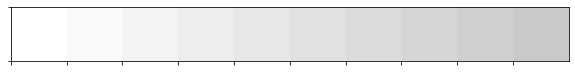

In [12]:
zy_g=['经济学类','数学类','物理学类','化学类','心理学类','统计学类','机械类','仪器类','材料类','能源动力类','自动化类','电气类','电子信息类','计算机类','土木类','水利类']
xl_g=['本科及以上','专科']

di_color="#18314c"
pic_path='E:/桌面/专业信息/'
bd="path://M506.50362 0c20.127485 0 40.084398 2.217435 59.870739 6.652304a312.715158 312.715158 0 0 1 55.720155 17.853193c17.398334 7.505164 32.86352 16.033759 46.395558 25.585786 13.588895 9.495169 24.164353 19.047196 31.840089 28.542365 18.023765 21.776346 31.271516 45.826985 39.572682 72.038201 8.301166 26.154359 14.214325 51.171571 17.682621 75.051638 3.468295 27.291505 5.230872 54.810439 5.230872 82.727374 4.889728 3.411438 8.699167 7.846308 11.485175 13.304608 2.72915 4.776013 5.003443 10.859745 6.766018 18.364909 1.705719 7.505164 1.876291 16.659189 0.511716 27.575791a92.904831 92.904831 0 0 1-8.869739 34.228095c-4.548584 8.528595-9.552027 15.124042-15.124042 19.900056a52.87729 52.87729 0 0 1-19.786341 11.257746c-3.411438 11.542032-6.936591 22.458634-10.404886 32.692948a251.820988 251.820988 0 0 1-11.940034 26.040644c-4.548584 8.528595-9.608884 15.124042-15.180899 19.900055-13.190894 10.234314-23.936924 18.876624-32.294947 26.040645-8.301166 7.16402-13.873182 19.217768-16.65919 36.274958-2.10372 10.234314-2.786008 20.582343-2.10372 31.157801 0.739145 10.518601 3.638867 21.094059 8.869739 31.669517 5.230872 10.518601 13.190894 20.582343 23.993781 30.13437 10.74603 9.495169 25.870072 18.023765 45.31527 25.528928 17.341477 6.822876 36.274958 12.906607 56.800444 18.364909 20.468629 5.458301 40.425541 11.769461 59.927596 18.876624 19.445197 7.16402 36.616102 16.033759 51.569572 26.55236 14.896613 10.575458 25.528928 25.017213 31.783232 43.438978 3.411438 10.859745 6.083731 24.334925 7.78945 40.368684 1.705719 15.920044 2.615436 32.124375 2.615436 48.499278 0 16.318046-1.194003 31.669517-3.638867 45.9407-2.444864 14.32804-6.083731 25.187785-10.97346 32.692948-3.411438 4.776013-13.361466 9.552027-29.679511 14.271183-16.318046 4.776013-36.44553 9.381455-60.439311 13.816324-23.936924 4.43487-50.716713 8.358023-80.225653 11.769461a2873.340589 2873.340589 0 0 1-175.063631 14.271183c-27.462077 1.364575-51.228429 2.046863-71.355914 2.046863-20.184342 0-43.60955-0.682288-70.389339-2.046863-26.722932-1.364575-54.35558-3.240866-82.841088-5.628873-28.428651-2.388007-56.743587-5.117157-84.887951-8.130594-28.144364-3.070294-53.673293-6.31116-76.586785-9.722598-22.97035-3.411438-42.415547-6.822876-58.392449-10.234315-15.920044-3.411438-26.040644-6.822876-30.191227-10.234314-6.936591-5.401444-12.338034-22.11749-16.147474-50.034425-3.809439-27.860078-2.274292-63.964464 4.662299-108.256302 3.468295-25.187785 13.759467-44.405552 30.702943-57.710161 17.05719-13.247751 36.843531-23.823209 59.472737-31.669517 22.572349-7.78945 45.997557-14.782898 70.332482-20.923487A228.566352 228.566352 0 0 0 316.827663 682.287618c14.612326-8.869739 25.6995-17.341477 33.318378-25.585786 7.675736-8.130594 13.247751-16.318046 16.716047-24.448639 3.411438-8.187451 5.174014-16.716047 5.174014-25.585786 0-8.812882-0.341144-18.706052-1.023431-29.565797-1.364575-15.692615-6.936591-28.087507-16.659189-37.29839A549.696391 549.696391 0 0 0 322.058534 511.715713a61.292171 61.292171 0 0 1-14.612326-19.900055 349.33126 349.33126 0 0 1-11.485175-26.040644c-3.411438-10.234314-6.936591-21.150916-10.404886-32.692948a48.214992 48.214992 0 0 1-14.555469-7.16402 93.928262 93.928262 0 0 1-13.588895-14.271183 79.998223 79.998223 0 0 1-12.508607-26.609217c-4.150583-11.542032-5.68573-22.11749-4.662298-31.61266 1.023431-9.552027 2.95658-17.739478 5.68573-24.562354 2.842865-7.448306 7.334592-14.612326 13.588895-21.435203-0.682288-25.870072 0.682288-51.740144 4.150583-77.610216 2.842865-21.776346 7.846308-45.258412 15.124042-70.503054 7.277735-25.187785 18.194336-47.646419 32.806663-67.375902 13.190894-19.104053 27.973792-34.569239 44.348695-46.509273 16.261188-11.940033 32.977235-21.264631 49.977568-28.087507 17.05719-6.822876 34.057524-11.37146 51.057857-13.759467 17.05719-2.388007 33.545808-3.58201 49.465852-3.58201z"
#象形条形图
def pictorial_reversal_bar(x_data,y1_data,y2_data,picture_name,color='#ebbb04',color_1=get_lighter_color('#FFFFFF','#c4c4c4')[0][1],label_fontsize=16,label_fontfamily='Bahnschrift SemiLight Condensed',axislabel_fontsize=21,height = '500px',pos_left="35%"):
    # 标签格式
    jscode = "function (params) {return 'Top'+(5-params.value[1]).toString()}"
#     jscode ="function (params) {return ''}"
    a = (
    PictorialBar()
    .add_xaxis(x_data)
#     .add_yaxis("",y2_data,label_opts=opts.LabelOpts(is_show=False),symbol_size=[25,25],
#                itemstyle_opts=opts.ItemStyleOpts(color=color_1),symbol=bd,symbol_repeat=True) #添加辅助条形图,增加灰色进度条
    .add_yaxis("",y1_data,symbol_size=['100%',25],
               label_opts=opts.LabelOpts(position="right",color=color,font_weight='bold',
#                                          formatter =JsCode("function (params) {return (params.value/3352*100).toFixed(2) + '%' + ' ' + params.value + '人'}"),
                                         formatter=JsCode(jscode),
                                         font_size=label_fontsize,font_family =label_fontfamily                                     
                                         ),
               itemstyle_opts=opts.ItemStyleOpts(color=color),symbol=cube)#设置柱形图样式
  
    .reversal_axis()#翻转x轴和y轴
    .set_global_opts(
        xaxis_opts=opts.AxisOpts(
        is_show=False),#不显示x轴
                     yaxis_opts=opts.AxisOpts(axisline_opts=opts.AxisLineOpts(linestyle_opts=opts.LineStyleOpts(color=color)),
                                             axistick_opts=opts.AxisTickOpts(
                                                 linestyle_opts=opts.LineStyleOpts(color=color)),
                                              axislabel_opts=opts.LabelOpts(font_size=axislabel_fontsize,
                                                                            color=color,font_family = '微软雅黑')))
    )
    a = (#PictorialBar 图表对象确实没有提供直接设置背景颜色的选项
         Grid(init_opts = opts.InitOpts(height = height,width='1000px',bg_color=di_color))  #设置图形大小,高度:height,宽度:width
        .add(a, grid_opts=opts.GridOpts(pos_left=pos_left))#位置调整
    )
    return a

# 就业行业

In [16]:
sql='''select zy,count(*) as num from(
select * ,substring_index(substring_index(about_major,'，', help_topic_id), '，', -1) as zy from 
(select a.company_name,degree_require,about_major,(CHAR_LENGTH(about_major) - CHAR_LENGTH(REPLACE(about_major, '，', ''))) as num
from c_job_publish a
join c_company b
on a.company_id=b.company_id
where is_publish=1 and job_number REGEXP '^[0-9]+$' and job_number < 200 and salary_min < 20 and is_disable=0 and state<>'未通过' and is_cancel_recruit=0
and case when month(FROM_UNIXTIME(publish_time)) > 8 then year(FROM_UNIXTIME(publish_time)) +1
     when month(FROM_UNIXTIME(publish_time)) < 9 then year(FROM_UNIXTIME(publish_time)) else null end=2023
) a
left join `test`.help_topic b on a.num+1>=help_topic_id
)
group by zy
order by num desc
limit 30'''
data_hy=pd.read_sql(sql=sql,con=conn1)
data=data_hy.copy()

C:\Users\Administrator\AppData\Roaming\Python\Python38\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [19]:
data.iloc[2:]

,zy,num
2,机械设计制造及其自动化,17574
3,机械类,14485
4,电气工程及其自动化,14279
5,机械工程,12035
6,机械电子工程,8864
7,临床医学,8680
8,计算机科学与技术,8347
9,电气类,7739
10,土木工程,7405
11,市场营销,7108


In [8]:
for zy in zy_g:
    for xl in xl_g:
        data1=data[(data['zydl']==zy) & (data['xl']==xl) ]
        if data1.shape[0]==0:continue
        value_count_1 = []
        for i in range(data1.shape[0]):
            value_count_1.append(max(data1['num'])*1.3)

        tempg=data1['dwhy'].tolist()
        max_len=max({len(i) for i in data1['dwhy'].tolist()})
        for i in range(len(tempg)):
        #     tempg[i]=(f'Top{i+1}'+'  '*(max_len-len(tempg[i]))+tempg[i])
            tempg[i]=tempg[i]+' '*int((max_len-len(tempg[i]))*3.4)

        grid=pictorial_reversal_bar(tempg[::-1],list(zip(data1['num'].tolist()[::-1],range(5))),value_count_1,'1')
        make_snapshot(snapshot,grid.render(), pic_path+f'就业行业/{xl}_{zy}_就业行业.png',pixel_ratio = 5)

# 就业单位

In [10]:
ranking=10
sql=f'''
select * from(
select *,ROW_NUMBER() over(PARTITION by xl,zydl order by num desc) as ranking from(
select case when xl_c='专科毕业生' then '专科' else '本科及以上' end as xl,zydl,dwmc,count(*) as num from dw_2022_s_employment_hunan_province
where jylb in ('签劳动合同形式就业','签就业协议形式就业','其他录用形式就业')
group by xl,zydl,dwmc
having dwmc is not null)
)
where ranking<={ranking}
order by xl,zydl,ranking'''
data_dw=pd.read_sql(sql=sql,con=conn)
data=data_dw.copy()

C:\Users\Administrator\AppData\Roaming\Python\Python38\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [13]:
word_size_range=[15, 25]#字体大小太大了会显示不下
color_list = ['#02d0e7','#43f74b','#f93b42','#f83a87','#ffff00','#48e5e5','#02d0e7']#建立颜色数组
colormap = colors.ListedColormap(color_list)#调用

for zy in zy_g:
    for xl in xl_g:
        data1=data[(data['zydl']==zy) & (data['xl']==xl) ]
        if data1.shape[0]==0:continue
        # 准备文本数据
        g1=data1['dwmc'].tolist()
        g2=data1['num'].tolist()
        dict1={}
        for i in range(len(g1)):
            dict1[g1[i]]=g2[i]


#         # 创建词云对象
#         wc = wordcloud.WordCloud(
#             width=1200,height=800,
#             font_path=r'C:\Windows\Fonts\msyh.ttc',
#             colormap=colormap,
#             background_color="#18314c")

#         # 生成词云图

#         wc.generate_from_frequencies(dict1)

#         # 显示词云图
# #         plt.imshow(wc, interpolation='bilinear')
# #         plt.axis('off')
# #         plt.show()
#         wc.to_file(pic_path+f'就业行业/{xl}_{zy}_就业单位.png')

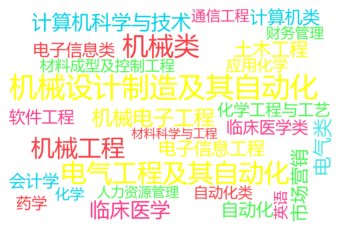

In [27]:
word_size_range=[15, 25]#字体大小太大了会显示不下
color_list = ['#02d0e7','#43f74b','#f93b42','#f83a87','#ffff00','#48e5e5','#02d0e7']#建立颜色数组
colormap = colors.ListedColormap(color_list)#调用

data1=data.iloc[2:]
# 准备文本数据
g1=data1['zy'].tolist()
g2=data1['num'].tolist()
dict1={}
for i in range(len(g1)):
    dict1[g1[i]]=g2[i]


# 创建词云对象
wc = wordcloud.WordCloud(
    width=1200,height=800,
    font_path=r'C:\Windows\Fonts\msyh.ttc',
    colormap=colormap,
    background_color="#ffffff")

# 生成词云图

wc.generate_from_frequencies(dict1)

# 显示词云图
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()
wc.to_file('1.png')

In [22]:
dict1

{'机械设计制造及其自动化': 17574,
 '机械类': 14485,
 '电气工程及其自动化': 14279,
 '机械工程': 12035,
 '机械电子工程': 8864,
 '临床医学': 8680,
 '计算机科学与技术': 8347,
 '电气类': 7739,
 '土木工程': 7405,
 '市场营销': 7108,
 '电子信息工程': 6601,
 '计算机类': 6478,
 '自动化': 6462,
 '会计学': 5924,
 '临床医学类': 5721,
 '电子信息类': 5716,
 '软件工程': 5665,
 '化学工程与工艺': 5562,
 '药学': 5240,
 '应用化学': 5164,
 '材料成型及控制工程': 5076,
 '自动化类': 4960,
 '通信工程': 4856,
 '财务管理': 4844,
 '英语': 4773,
 '化学': 4715,
 '人力资源管理': 4418,
 '材料科学与工程': 4325}

In [14]:
dict1

{'中国水利水电第八工程局有限公司': 15,
 '中交广州航道局有限公司': 11,
 '中建四局第五建筑工程有限公司': 9,
 '保利长大工程有限公司': 6,
 '中交一公局集团水利工程有限公司': 5,
 '中交二航局第四工程有限公司': 5,
 '中国电建集团中南勘测设计研究院有限公司': 5,
 '中国铁建港航局集团有限公司': 4,
 '广东水电二局股份有限公司': 4,
 '益阳市水利水电勘测设计研究院有限公司': 4}

# 文字

In [15]:
data_zy=pd.read_excel('E:/桌面/专业信息/专业目录.xlsx')

In [16]:
data_temp=data_zy.groupby(['学历类型','学科门类','专业大类','专业大类代码'])['专业名称'].count().reset_index(name='专业数量')

In [17]:
groupt=[]
for i in range(data_temp.shape[0]):
    line=data_temp.loc[i]
    temp_3=data_zy[(data_zy['学历类型']==line['学历类型'])&(data_zy['专业大类']==line['专业大类'])]['专业名称'].head(3).tolist()
    str1=str(line['专业大类'])+'包含\n'+reduce(lambda x,y:x+'\n'+y,temp_3)+'\n等'+str(line['专业数量'])+'个细分专业\n'
    try:
        temp_3=[f'“{j}”'for j in data_hy[(data_hy['xl']==line['学历类型'])&(data_hy['zydl']==line['专业大类'])]['dwhy'].head(3).tolist()]
        str1+='主要流向的行业为\n'+reduce(lambda x,y:x+'\n'+y,temp_3)+'和其他行业\n'
        temp_3=[f'“{j}”'for j in data_dw[(data_dw['xl']==line['学历类型'])&(data_dw['zydl']==line['专业大类'])]['dwmc'].head(3).tolist()]
        str1+='主要流向的企业有\n'+reduce(lambda x,y:x+'\n'+y,temp_3)+'\n和其他公司'
#         print(str1)
#         break
    except:
        pass
    groupt.append(str1)
    

In [18]:
data_temp['自动化文案']=groupt
data_temp.to_excel('E:/桌面/专业信息/文案.xlsx')

In [19]:
data_dw[(1)&(data_dw['zydl']=='经济学类')]

,xl,zydl,dwmc,num,ranking
2536,本科及以上,经济学类,深圳市维度数据科技股份有限公司,8,1
2537,本科及以上,经济学类,中国农业银行股份有限公司湖南省分行,8,2
2538,本科及以上,经济学类,中国邮政储蓄银行股份有限公司湖南省分行,7,3
2539,本科及以上,经济学类,中国工商银行股份有限公司湖南省分行,7,4
2540,本科及以上,经济学类,湖南宾之郎实业集团有限公司,6,5
2541,本科及以上,经济学类,湖南兴盛优选电子商务有限公司,6,6
2542,本科及以上,经济学类,慕思健康睡眠股份有限公司,4,7
2543,本科及以上,经济学类,比亚迪股份有限公司,4,8
2544,本科及以上,经济学类,长沙兢科电子商务有限责任公司,4,9
2545,本科及以上,经济学类,华为技术有限公司,4,10


# 湖南省就业数据只能匹配119个大类

In [452]:
j=0
for i in data_zy['专业大类'].unique():
    if i in data_dw['zydl'].unique() and i in data_hy['zydl'].unique():
        j+=1
j

119